In [1]:
# IMPORT THE NECESSARY LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [3]:
# IMPORT THE DATASET

In [4]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [5]:
X.shape

(2000, 20)

In [6]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [7]:
# SPLIT THE DATASET INTO TRAIN AND TEST

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Random Forests

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9826611111111112


In [11]:
ytrain_pred

array([[0.98, 0.02],
       [0.99, 0.01],
       [0.02, 0.98],
       ...,
       [0.98, 0.02],
       [0.99, 0.01],
       [0.28, 0.72]])

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


# Adaboost Classifier

In [13]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


# KNNClassifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('KNN classifier train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('KNN classifier test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

KNN classifier train roc-auc: 0.981670071491109
KNN classifier test roc-auc: 0.9426111111111111


# No we will focus on selecting the best threshold for maximum accuracy

In [17]:
pred=[]

for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9845222222222223


In [18]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.05,0.000008,0.463282,0.0
2,0.95,0.966929,0.538202,0.8
3,0.89,0.761539,0.509875,0.8
4,0.65,0.779443,0.490344,0.4
...,...,...,...,...
595,0.02,0.024239,0.461121,0.0
596,0.01,0.000003,0.441377,0.0
597,0.98,0.984385,0.532403,1.0
598,0.07,0.001147,0.441720,0.2


In [19]:
final_prediction

0      0.885262
1      0.128323
2      0.813783
3      0.740353
4      0.579947
         ...   
595    0.126340
596    0.112845
597    0.874197
598    0.178217
599    0.832357
Length: 600, dtype: float64

In [20]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.9109413 , 0.9109413 , 0.90572159, 0.90327475, 0.81446108,
       0.81412833, 0.80698866, 0.8055558 , 0.78627646, 0.78571156,
       0.76547465, 0.76287124, 0.73675756, 0.73637362, 0.71652563,
       0.71393711, 0.66518151, 0.66243537, 0.60866701, 0.60675354,
       0.60212652, 0.59050386, 0.58558969, 0.58364346, 0.55088469,
       0.54219563, 0.54042732, 0.53127948, 0.48240225, 0.48116892,
       0.4471034 , 0.40068654, 0.39629719, 0.35386723, 0.35336612,
       0.24651541, 0.24640421, 0.23969741, 0.23396893, 0.20938001,
       0.20848417, 0.12033548, 0.1203351 , 0.10632697])

In [21]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
30,0.447103,0.961667
29,0.481169,0.960000
28,0.482402,0.958333
27,0.531279,0.958333
25,0.542196,0.958333


In [22]:
accuracy_ls

,thresholds,accuracy
30,0.447103,0.961667
29,0.481169,0.960000
28,0.482402,0.958333
27,0.531279,0.958333
25,0.542196,0.958333
24,0.550885,0.958333
26,0.540427,0.956667
31,0.400687,0.951667
32,0.396297,0.950000
22,0.585590,0.945000


In [23]:
# PLOT THE ROC CURVE

In [24]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

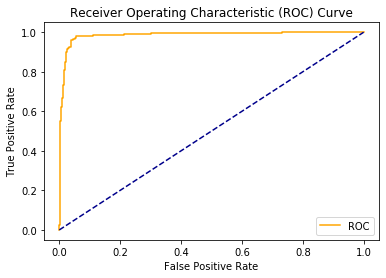

In [25]:
plot_roc_curve(fpr,tpr)